In [1]:
import numpy as np
import pandas as pd
import bilby
import matplotlib.pylab as plt
import glob

In [2]:
def get_blu(index):
    t1,t2 = trigger_pairs[index,:2].astype('int')
    bext = trigger_pairs[index,2]
    pair_dir=str(t1)+'_'+str(t2)
    shell_comm= '%s/%s'%(bilby_dirs,pair_dir)
    result_files = glob.glob(shell_comm+'/outdir_*/result/*.json')
    log_joint_BLU = 0
    print(index)
    if len(result_files) == 3:
        t1_out=glob.glob(shell_comm + '/outdir_'+str(t1) + '/result/*.json')[0]
        t2_out=glob.glob(shell_comm + '/outdir_'+str(t2) + '/result/*.json')[0]
        joint_out=glob.glob(shell_comm + '/outdir_'+pair_dir + '/result/*.json')[0]
        t1_res=bilby.result.read_in_result(t1_out)
        t2_res=bilby.result.read_in_result(t2_out)
        joint_res=bilby.result.read_in_result(joint_out)
        log_joint_BLU = joint_res.log_evidence-(t1_res.log_evidence + t2_res.log_evidence)
    else:
        print('result not available')

    return [bext,log_joint_BLU]

In [3]:
inj_file = '../haris_GW19O915/GW190915_LHV_LHV_Bext_above_minus5.dat'
trigger_pairs=np.genfromtxt(inj_file,skip_header=True)
n=len(trigger_pairs[:,0])

In [4]:
out='dumpty_GW19O915_110121'

bilby_dirs='../run_dir/' + out

# Save BLUs for each injection pair (skip if already saved)

In [5]:
#blus=np.array([get_blu(i) for i in range(n)])

In [7]:
#np.savez('../results/'+out,blus=blus)

# Load saved BLUs

In [5]:
blus=dict(np.load('../results/'+out+'.npz'))['blus']
missing_ids=np.where(blus[:,1] == 0)[0]
print(missing_ids.shape)

(70,)


In [6]:
# load blus for the missing ids if available
blus[missing_ids,:]=np.array([get_blu(i) for i in missing_ids])
np.savez('../results/'+out,blus=blus)

6
7
8
9
10
result not available
11
12
result not available
15
16
17
result not available
18
22
23
result not available
27
28
29
result not available
32
result not available
34
result not available
36
39
result not available
43
44
45
result not available
48
49
50
52
53
54
result not available
55
59
60
result not available
61
63
65
66
result not available
67
70
71
72
73
74
result not available
75
result not available
77
78
79
result not available
80
result not available
83
84
result not available
85
result not available
87
88
90
91
94
95
result not available
96
result not available
98
99
103
106
107
124
135
result not available
137
138
result not available
148
result not available
153
result not available
155
result not available
156


In [7]:
blus.shape

(162, 2)

In [8]:
finished_ids=np.where(blus[:,1] != 0)[0]


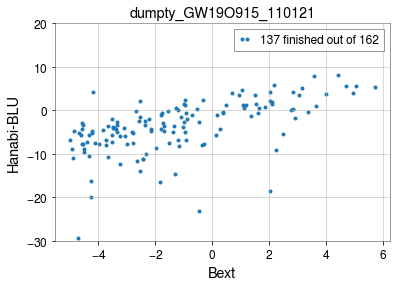

finished injs:  137 , total injs:  162


In [13]:
plt.plot(blus[finished_ids,0],blus[finished_ids,1],'.',label=str(len(finished_ids)) + ' finished out of '+ str(n))
plt.xlabel('Bext')
plt.ylabel('Hanabi-BLU')
plt.legend()
plt.ylim(-30,20)
plt.title(out)
plt.savefig('../results/'+out+'-corr')

#plt.grid()
plt.show()
print('finished injs: ' ,len(finished_ids),', total injs: ' ,n)

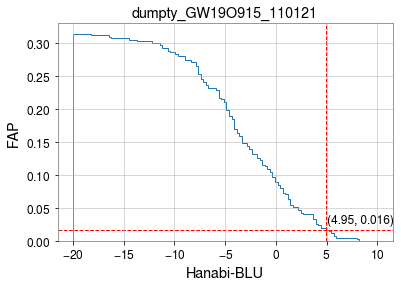

In [10]:
correction_factor = n/len(finished_ids)
blu_hanabi = blus[finished_ids,1]
bins=np.linspace(-20,10,30*4)
blu_event =4.95
x=plt.hist(blu_hanabi,bins=bins,histtype='step',cumulative=-1,weights=np.ones_like(blu_hanabi)*correction_factor/500)
idx=(x[1]>blu_event - 0.025) & (x[1]<blu_event + 0.025)
far_event=x[0][idx[:-1]][0]
plt.xlabel('Hanabi-BLU')
plt.plot(blu_event,far_event,'+')
plt.axhline(far_event,ls='dashed',color='r',lw=1)
plt.axvline(blu_event,ls='dashed',color='r',lw=1)
plt.annotate('('+ str(blu_event)+ ', '+ str(far_event)[:5] + ')' ,xy=(blu_event+0.1,far_event+0.01),fontsize=12,color='black')
plt.ylabel('FAP')
plt.title(out)
plt.savefig('../results/'+out+'-FAP')
plt.show()